In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [184]:
#act = pd.read_csv('data/atusact_2014.dat')
#cps = pd.read_csv('data/atuscps_2014.dat')
#resp = pd.read_csv('data/atusresp_2014.dat')
#rost = pd.read_csv('data/atusrost_2014.dat')
atussum = pd.read_csv('data/atussum_2014.dat') 
#who = pd.read_csv('data/atuswho_2014.dat')

In [240]:
atussum.rename(columns={'TEAGE':'Age', 'TESEX':'Sex', 'tucaseid':'ID', 't120302':'drug_use','t120301':'relaxing_thinking', 't050101':'working'}, inplace=True)
atussum.rename(columns={'t120303':'TV','t120305':'Radio','t140101':'religious','t160101':'phone', 't120313':'writing'}, inplace=True)
atussum.rename(columns={'t120404':'gambling', 't010101':'sleeping','t500106':'gap', 't180501':'work_travel'}, inplace=True)
corr = atussum.corr()
w_data = atussum[atussum.Sex == 2]
yw_data = w_data[w_data.Age < 26]
m_data = atussum[atussum.Sex == 1]
ym_data = m_data[m_data.Age <26]
om_data = m_data[m_data.Age >35]
print("Young men slept and average of {}".format(ym_data['sleeping'].mean()))
print("Young women slept an average of {}".format(yw_data['sleeping'].mean()))
print("Young men spend an average of {} minutes grooming".format(ym_data['t010201'].mean()))
print("Young wommen spend an average of {} minutes grooming".format(yw_data['t010201'].mean()))
print("Men overall spend an average of {} minutes grooming".format(m_data['t010201'].mean()))
print("Women overall spend an average of {} minutes grooming".format(w_data['t010201'].mean()))
print("Young men spend an average of {} minutes working".format(ym_data['working'].mean()))
print("Young women spend an average of {} minutes working".format(yw_data['working'].mean()))
print("Young men spend an average of {} minutes taking classes".format(ym_data['t060101'].mean()))
print("Young women spend an average of {} minutes taking classes".format(yw_data['t060101'].mean()))
print("Young men spend an average of {} studying".format(ym_data['t060301'].mean()))
print("Young women spend an average of {} studying".format(yw_data['t060301'].mean()))

print("Young men spend an average of {} minutes taking care of household children".format(ym_data['t030101'].mean()))
print("Young women spend an average of {} minutes taking care of household children".format(yw_data['t030101'].mean()))


Young men slept and average of 574.9446366782007
Young women slept an average of 584.0144230769231
Young men spend an average of 34.16262975778547 minutes grooming
Young wommen spend an average of 54.42788461538461 minutes grooming
Men overall spend an average of 32.14227166276346 minutes grooming
Women overall spend an average of 47.3147804576376 minutes grooming
Young men spend an average of 126.62975778546713 minutes working
Young women spend an average of 103.01923076923077 minutes working
Young men spend an average of 60.37543252595156 minutes taking classes
Young women spend an average of 46.181089743589745 minutes taking classes
Young men spend an average of 24.89446366782007 studying
Young women spend an average of 37.45032051282051 studying
Young men spend an average of 1.2197231833910034 minutes taking care of household children
Young women spend an average of 17.15705128205128 minutes taking care of household children


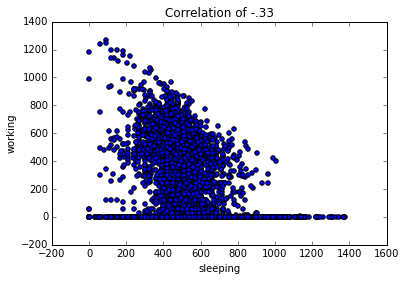

In [186]:
atussum.plot(kind = 'scatter', x = 'sleeping', y = 'working', title = 'Correlation of -.33')


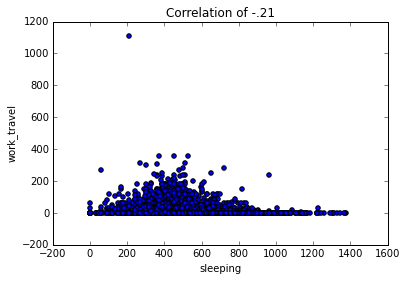

In [187]:
atussum.plot(kind = 'scatter', x = 'sleeping', y = 'work_travel', title = 'Correlation of -.21')

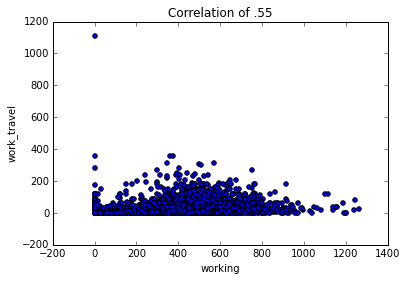

In [188]:
atussum.plot(kind='scatter', x ='working', y = 'work_travel', title= 'Correlation of .55')

In [189]:
youth = atussum[atussum.Age < 25]
ycorr = youth.corr()
print(ycorr['religious'])
# for x in ycorr['religious']:
#     if x > .50 or x < -.50:
#         print(x)

ID                  -0.007893
TUFINLWGT           -0.089172
TRYHHCHILD           0.051461
Age                 -0.066799
Sex                 -0.017902
PEEDUCA             -0.052645
PTDTRACE            -0.030022
PEHSPNON            -0.074408
GTMETSTA            -0.004206
TELFS                0.090435
TEMJOT              -0.084371
TRDPFTPT            -0.093206
TESCHENR            -0.029539
TESCHLVL             0.011977
TRSPPRES             0.070266
TESPEMPNOT          -0.072695
TRERNWA             -0.029573
TRCHILDNUM           0.034822
TRSPFTPT            -0.063660
TEHRUSLT            -0.014724
TUDIARYDAY          -0.184806
TRHOLIDAY           -0.022379
TRTEC               -0.016185
TRTHH                0.015176
sleeping             0.038969
t010102             -0.010291
t010201              0.051933
t010299             -0.007104
t010301             -0.016332
t010399                   NaN
t010401             -0.011679
t010501                   NaN
t019999                   NaN
t020101   

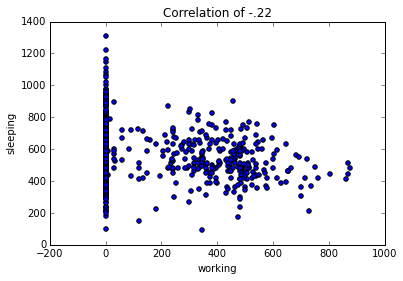

In [190]:
youth.plot(kind='scatter', x = 'working', y = 'sleeping', title= 'Correlation of -.22')


In [200]:
for x in ycorr['t120101']:
    if x > .40 or x < -.40:
        print(x)

#print(ycorr['drug_use'])

1.0


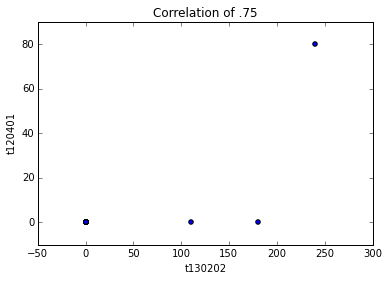

In [196]:
youth.plot(kind='scatter', x ='t130202', y = 't120401', title = 'Correlation of .75')